In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4-3-6 finance-datareader

In [1]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import FinanceDataReader as fdr

fdr.__version__

'0.9.42'

In [3]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [4]:
df_krx[df_krx["Name"] == "삼성전자"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4049,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"한종희, 경계현",http://www.sec.co.kr,경기도


In [5]:
import FinanceDataReader as fdr

df = fdr.DataReader('005930', '2010-01-01', '2022-12-31')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516
2010-01-05,16520,16580,16300,16440,559219,0.016069
2010-01-06,16580,16820,16520,16820,459755,0.023114
2010-01-07,16820,16820,16260,16260,443237,-0.033294
2010-01-08,16400,16420,16120,16420,295798,0.009840
2010-01-11,16420,16460,15940,15940,398901,-0.029233
2010-01-12,15940,16180,15900,16180,384460,0.015056
2010-01-13,16100,16119,15940,15940,267619,-0.014833
2010-01-14,16120,16620,16000,16540,532705,0.037641


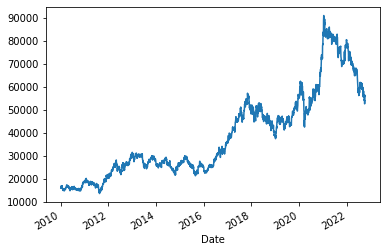

In [6]:
df["Close"].plot()

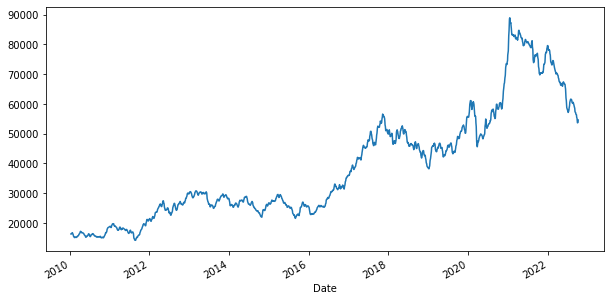

In [7]:
df["Close"].rolling(7).mean().plot(figsize=(10,5))

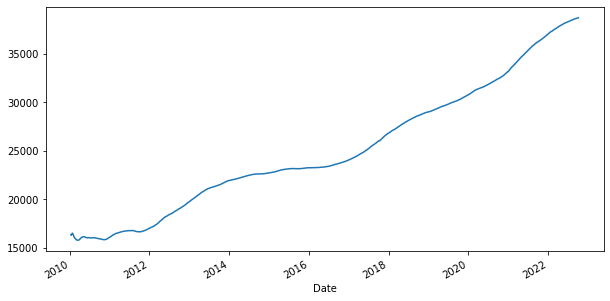

In [8]:
df["Close"].expanding(7).mean().plot(figsize=(10,5))

In [9]:
df.rolling(window=7).mean().head(14)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,16391.428571,16494.285714,16148.571429,16320.000000,397234.428571,0.002010
2010-01-13,16397.142857,16485.571429,16140.000000,16285.714286,401284.142857,-0.001897
2010-01-14,16340.000000,16491.285714,16097.142857,16300.000000,397496.428571,0.001185


In [10]:
df.ewm(com=0.5).mean()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,16060.000000,16180.000000,16000.000000,16180.000000,2.392710e+05,0.012516
2010-01-05,16405.000000,16480.000000,16225.000000,16375.000000,4.792320e+05,0.015181
2010-01-06,16526.153846,16715.384615,16429.230769,16683.076923,4.657479e+05,0.020673
2010-01-07,16724.500000,16786.000000,16315.000000,16397.500000,4.505530e+05,-0.015754
2010-01-08,16507.272727,16540.991736,16184.462810,16412.561983,3.469567e+05,0.001379
...,...,...,...,...,...,...
2022-09-30,52698.724797,53706.898836,52096.880415,53013.958624,2.014841e+07,0.003333
2022-10-04,54432.908266,54835.632945,53698.960138,54471.319541,1.948176e+07,0.027477
2022-10-05,56077.636089,56411.877648,54832.986713,55490.439847,2.146657e+07,0.018821
